In [133]:
import pandas as pd
import seaborn as sns

In [134]:
df = pd.read_csv('racing.csv')

/var/folders/1j/bkjhwqp963ggl1k7p_4t0mrh0000gn/T/ipykernel_1009/3767263161.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('racing.csv')


In [135]:
df.head(4)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3


In [136]:
df.shape

(7461195, 13)

In [137]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [138]:
#cleaning the data and only looking at US races, 50 miles in 2020


In [139]:
#first finding the races = 50km/50 miles
#mi = miles
df[df['Event distance/length'] =='50mi'].head(4)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58


In [140]:
df[df['Event distance/length'].isin(['50km', '50mi']) & (df['Year of event'] == 2020)].head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785


In [141]:
df[df['Event name'] =='Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)


51923      USA
51924      USA
51925      USA
51926      USA
51927      USA
          ... 
6417091    USA
6417092    USA
6417093    USA
6417094    USA
6417095    USA
Name: Event name, Length: 338, dtype: object

In [142]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA'].head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56


In [143]:
#combining all the parameters; 50 km/mi, USA, 2020
df[df['Event distance/length'].isin(['50km', '50mi']) & (df['Year of event'] == 2020)   &  (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')].head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508


In [144]:
df2 = df[df['Event distance/length'].isin(['50km', '50mi']) & (df['Year of event'] == 2020)   &  (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [145]:
#removing USA from event name
df2['Event name'].str.split('(').str.get(0)

2539945    West Seattle Beach Run - Winter Edition 
2539946    West Seattle Beach Run - Winter Edition 
2539947    West Seattle Beach Run - Winter Edition 
2539948    West Seattle Beach Run - Winter Edition 
2539949    West Seattle Beach Run - Winter Edition 
                             ...                   
2760957     Yankee Springs Fall Trail Run Festival 
2760958     Yankee Springs Fall Trail Run Festival 
2760959     Yankee Springs Fall Trail Run Festival 
2760960     Yankee Springs Fall Trail Run Festival 
2760961     Yankee Springs Fall Trail Run Festival 
Name: Event name, Length: 26090, dtype: object

In [146]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

/var/folders/1j/bkjhwqp963ggl1k7p_4t0mrh0000gn/T/ipykernel_1009/3473829760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


In [147]:
#clean up athlete age(shows gender and race)
df2['athlete_age'] = 2020 - df2['Athlete year of birth']

/var/folders/1j/bkjhwqp963ggl1k7p_4t0mrh0000gn/T/ipykernel_1009/1958176905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2020 - df2['Athlete year of birth']


In [148]:
#remove letter from athlete performance
df2['athlete_age'] = df2['Athlete performance'].str.split(' ').str.get(0)

/var/folders/1j/bkjhwqp963ggl1k7p_4t0mrh0000gn/T/ipykernel_1009/1073881892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [149]:
#drop columns: Athletee club, athlete country, athlete year of birth, athlete age category
df2 = df2.drop(['Athlete country', 'Athlete club', 'Athlete year of birth', 'Athlete age category'], axis = 1)
df2.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,M,15.158,71287,3:17:55
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,M,12.369,629508,4:02:32


In [150]:
#clean null values
df2[df2['athlete_age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [151]:
df2 = df2.dropna()
df2.shape

(26090, 10)

In [152]:
df2.reset_index(drop = True).head(4)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,M,15.158,71287,3:17:55
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,M,12.369,629508,4:02:32
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,M,12.099,64838,4:07:57
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,M,11.449,704450,4:22:02


In [153]:
#fix types
df2['athlete_age'] = df2['athlete_age'].astype(int)

ValueError: invalid literal for int() with base 10: '3:17:55'

In [ ]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [ ]:
#rename columns
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_Age                  float64
athlete_age                    int64
dtype: object

In [ ]:
#rename columns
#Year of event                  int64
#Event dates                   object
#Event name                    object
#Event distance/length         object
#Event number of finishers      int64
#Athlete performance           object
#Athlete gender                object
#Athlete average speed        float64
#Athlete ID                     int64
#athlete_age                    int64



In [ ]:
df2 = df2.rename(columns = {'Year of event': 'Year',
                            'Event dates': 'Race_Day',
                            'Event name': 'Race_Name',
                            'Event distance/length': 'Race_Length',
                            'Event number of finishers': 'Race_number_of_Finishers',
                            'Athlete performance': 'Athlete_Performance',
                            'Athlete gender': 'Athlete_Gender',
                            'Athlete average speed': 'Athlete_Average_Speed',
                            'Athlete ID': 'Athlete_ID',
                            'athlete_age': 'Athlete_Age',
                            })

In [ ]:
df2.dtypes

Year                          int64
Race_Day                     object
Race_Name                    object
Race_Length                  object
Race_number_of_Finishers      int64
Athlete_Performance          object
Athlete_Gender               object
Athlete_Average_Speed       float64
Athlete_ID                    int64
athlete_Age                 float64
Athlete_Age                   int64
dtype: object

In [ ]:
#reorder columns
df3 = df2[['Race_Day', 'Race_Name', 'Race_Length', 'Race_number_of_Finishers', 'Athlete_ID', 'Athlete_Gender', 'Athlete_Age', 'Athlete_Performance', 'Athlete_Average_Speed' ]]

<Axes: xlabel='Race_Length', ylabel='Count'>

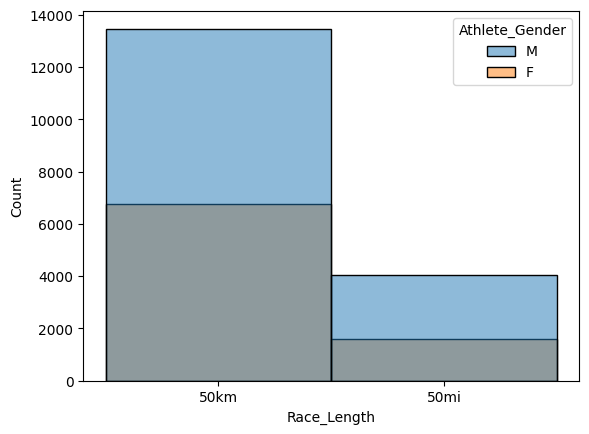

In [ ]:
sns.histplot(df3, x = 'Race_Length', hue = 'Athlete_Gender')

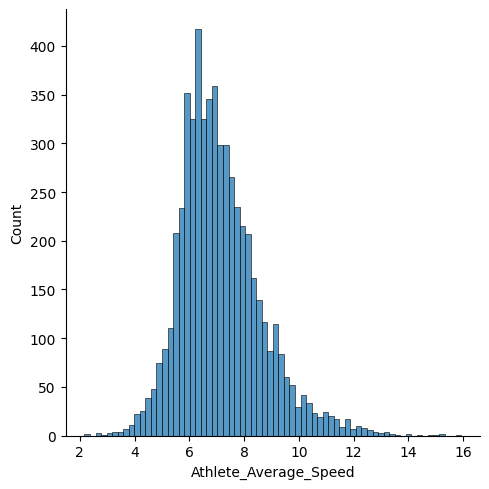

In [ ]:
#plotting the average athlete speed with displot
sns.displot(df3[df3['Race_Length'] == '50mi']['Athlete_Average_Speed'])

<Axes: xlabel='Race_Length', ylabel='Athlete_Average_Speed'>

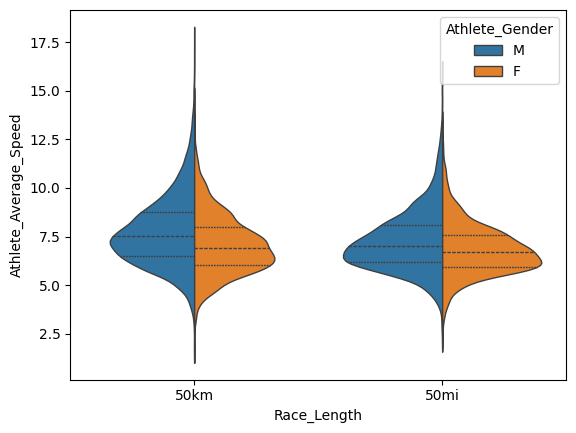

In [ ]:
#plotting the average speed per gender using a violin plot
sns.violinplot(data = df3, x= 'Race_Length', y= 'Athlete_Average_Speed', hue = 'Athlete_Gender', split = True, inner = 'quart', linewidth = 1) 

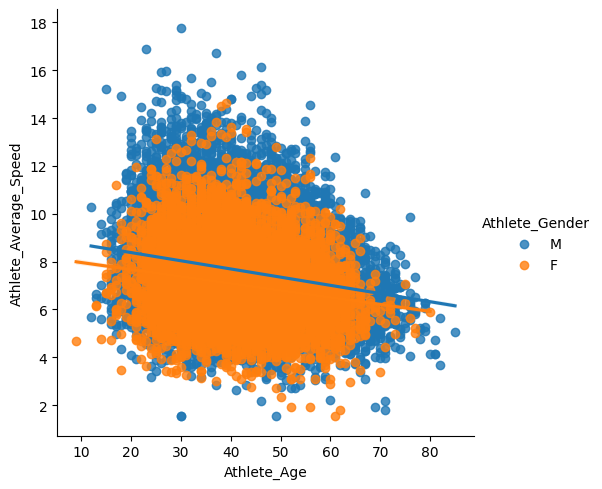

In [ ]:
sns.lmplot(data = df3, x= 'Athlete_Age', y= 'Athlete_Average_Speed', hue = 'Athlete_Gender')

In [ ]:
#Year
##Race_Day
#Race_Name
#Race_Length
#Race_number_of_Finishers
#Athlete_Performance
#Athlete_Gender
#Athlete_Average_Speed
#Athlete_ID
#athlete_Age
#Athlete_Age
#difference in speed for 50k,50mi male to female
df3.groupby(['Race_Length', 'Athlete_Gender'])['Athlete_Average_Speed'].mean()

Race_Length  Athlete_Gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: Athlete_Average_Speed, dtype: float64

In [ ]:
#age groups that perform the best
df3.query('Race_Length == "50mi"').groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending = False).query('count>19').head(5)

,mean,count
Athlete_Age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91


In [ ]:
#age groups that perform the worst

df3.query('Race_Length == "50mi"').groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending = True).query('count>9').head(5)

,mean,count
Athlete_Age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
